# Error Function

## Import Library

In [105]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import copy
from PIL import Image
# import pickle
import import_ipynb
sys.path.append(os.pardir)
from Ch2_3.handWrittenDigit import get_data, init_network, predict, img_show
from DataSet.mnist import load_mnist


## 오차제곱합 ( SSE )

### Define function SSE $\ :\ \frac{1}{2}\sum\limits_k(y_k-t_k)^2$

In [106]:
def sum_squares_error(y, t):
    return 0.5*np.sum((y-t)**2)

In [107]:
# get data
x, t = get_data()
network = init_network()

print('answer : ' + str(t[0]))
y_0 = predict(network,x[0])
print(y_0)
one_hot_0 = [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
error_0 = sum_squares_error(y_0,one_hot_0)
print('========================================================================')
print('answer : ' + str(t[1]))
y_1 = predict(network,x[1])
print(y_1)
one_hot_1 = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
error_1 = sum_squares_error(y_1,one_hot_1)
print('========================================================================')

answer : 7
[8.4412488e-05 2.6350631e-06 7.1549421e-04 1.2586256e-03 1.1727954e-06
 4.4990808e-05 1.6269318e-08 9.9706501e-01 9.3744702e-06 8.1831159e-04]
answer : 2
[4.8363311e-03 1.1045857e-03 9.4425237e-01 1.4309139e-02 5.6989512e-07
 6.6760429e-03 2.7533356e-02 1.2708423e-06 1.2864231e-03 4.7864624e-08]


1st error : 0.00293918838724494
2nd error : 0.05736168101429939
{2nd error} over {1st error} : 19.516163463093836


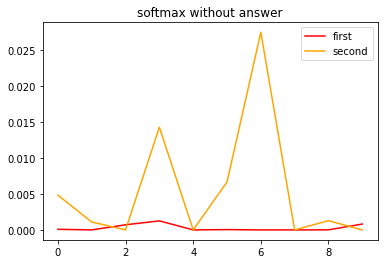

In [141]:
print('1st error : ' + str(error_0))
temp_0 = copy.deepcopy(y_0)
temp_0[7] = 0
plt.plot(temp_0,'-',label='first',color='red')
print('2nd error : ' + str(error_1))
temp_1 = copy.deepcopy(y_1)
temp_1[2]=0
print('{2nd error} over {1st error} : ' + str(error_1/error_0))
plt.title('softmax without answer')
plt.plot(temp_1,'-',label='second',color='orange')
plt.legend()
plt.show()

## 교차 엔트로피 오차 ( CEE )

### Define Function CEE $\ :\ -\sum\limits_kt_k\log(y_k)$

In [109]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [110]:
error_0 = cross_entropy_error(y_0,one_hot_0)
error_1 = cross_entropy_error(y_1,one_hot_1)
print('1st error : ' + str(error_0))
print('2nd error : ' + str(error_1))
print('{2nd error} over {1st error} : ' + str(error_1/error_0))
delta = 1e-7
X_0 = y_0[7]+delta
X_1 = y_1[2]+delta
X = np.linspace(0.8,1)

1st error : 0.00293918838724494
2nd error : 0.05736168101429939
{2nd error} over {1st error} : 19.516163463093836


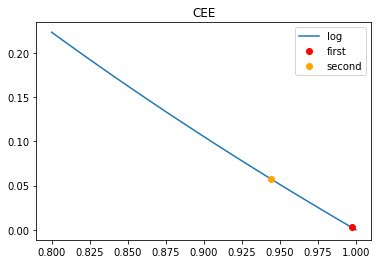

In [140]:
plt.plot(X,-np.log(X),'-',label='log')
plt.plot(X_0,error_0,'o',label='first',color='r')
plt.plot(X_1,error_1,'o',label='second',color='orange')
plt.legend()
plt.title('CEE')
plt.show()

## Mini-batch

In [112]:
(x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize=True, one_hot_label=True)
    
print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [113]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size,batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [114]:
batch_mask

array([ 9635, 12110, 23281, 24894, 12121, 31516, 26303, 55966, 49162,
        9006])

## Cross Entropy for Batch

### Define Function CEE for Batch $\ :\ -\frac{1}{N}\sum\limits_n\sum\limits_kt_{nk}\log y_{nk}$

### when t is label

In [115]:
def cross_entropy_error(y,t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size),t]+1e-7)) / batch_size

### when t is one-hot encoding

In [3]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    if t.size == y.size:
        t = t.argmax(axis=1)
    
    batch_size = y.shape[0]
    # return -np.sum(t*np.log(y+1e-7)) / batch_size
    return -np.sum(np.log(y[np.arange(batch_size),t])) / batch_size

In [117]:
y=np.zeros((batch_size,t_batch.shape[1]))
print("size of y : "+str(y.shape))
for i in np.arange(batch_size):
    y[i] = predict(network,x_batch[i])
    print(str(i)+' th predict : '+str(np.argmax(y[i])))
    print(str(i)+' th answer  : '+str(np.argmax(t_batch[i])))
    print("======================")
print("CEE for Batch : "+str(cross_entropy_error(y,t_batch)))
    

size of y : (10, 10)
0 th predict : 6
0 th answer  : 6
1 th predict : 5
1 th answer  : 5
2 th predict : 3
2 th answer  : 3
3 th predict : 4
3 th answer  : 4
4 th predict : 4
4 th answer  : 4
5 th predict : 6
5 th answer  : 6
6 th predict : 7
6 th answer  : 7
7 th predict : 3
7 th answer  : 3
8 th predict : 4
8 th answer  : 4
9 th predict : 3
9 th answer  : 3
CEE for Batch : 0.03148348677554773
